### Hyper-Spherical Echo State Network reservoir computing
Learning a [Mackey-Glass](http://www.scholarpedia.org/article/Mackey-Glass_equation) system

Implemented and tested here: 
"Echo State Networks with Self-Normalizing Activations on the Hyper-Sphere"

Read the paper here: 
https://arxiv.org/abs/1903.11691

The original pyESN.py demo has an error of 0.139603909616. 

Can we beat it using HyperSpherical projection, and a good amount of hyperparameter tuning?

We quickly re-run the orginal pyESN example using the new projection technique, and compare how it does.
This provides a worked example of how to run the code.

Note: In theory, the Hyper-Sphere projection should stabilise the ESN at the "edge of chaos", even under many spectral_radii stabily, offering a greater search space from which to tune and build great models.

However, the new "spherical radius" now also needs tuning - in relation to the input data values, rather than tuning the topology of the network itself (which is what the "spectral radius" is for).

This additional hyperparameter now adds to the tuning challenge overall, so:
In the sister notebook in this repo, I've shown how to tune the model using DEAP "Distributed Evolutionary Algorithms in Python" which uses genetic search over parameters to find the best performing ESN architecture. 

It seems to work very well, but your mileage may vary.


test error: 
0.0025463170501647085


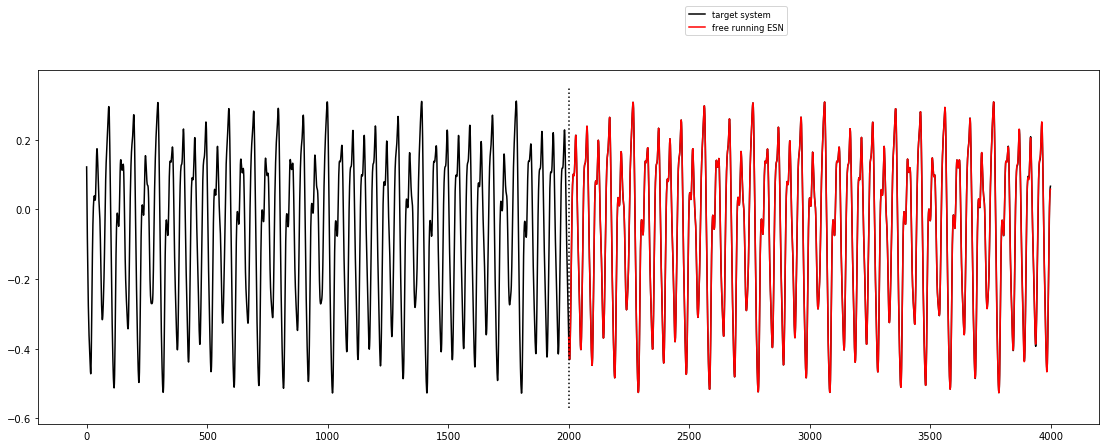

In [3]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline


size = 1000

data = np.load('mackey_glass_t17.npy') #  http://minds.jacobs-university.de/mantas/code
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = size,
          projection = 1,
          noise = 0.0,
          rectifier = 1,
          steepness = 2,
          sparsity = 0.6,
          sphere_radius = 38 ,
          teacher_forcing =  True,
          random_state=21,
          spectral_radius = 1.3,
        )

trainlen = 2000
future = 2000
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(19,6.5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='small')

In [2]:
print("our tuned test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

our tuned test error: 
0.0025463170501647085


In [ ]:
The original pyESN.py demo has an error of 0.139603909616

Below are some settings that score highly tuned using DEAP, that you could test out:
-----------

CONCLUSION: The original pyESN.py demo has an error of 0.139603909616, versus this tuned ESN with an MSE error of 
0.0006627234400759625

These are the parameters that get this score:
---------------------------------------------
n_reservoir     =  1073
projection      =  1
noise           =  1e-11
rectifier       =  1
steepness       =  2
sparsity        =  0.8672020622440834
sphere_radius   =  32.406030224796055
teacher_forcing =  True
random_state    =  169
spectral_radius =  1.400208448263032